In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine

In [55]:
iris = load_iris()
wine = load_wine()

In [7]:
features = pd.DataFrame(iris.data, columns=['w', 'x', 'y', 'z'])

In [8]:
features

,w,x,y,z
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.cluster import KMeans

In [21]:
wcss = []

In [22]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

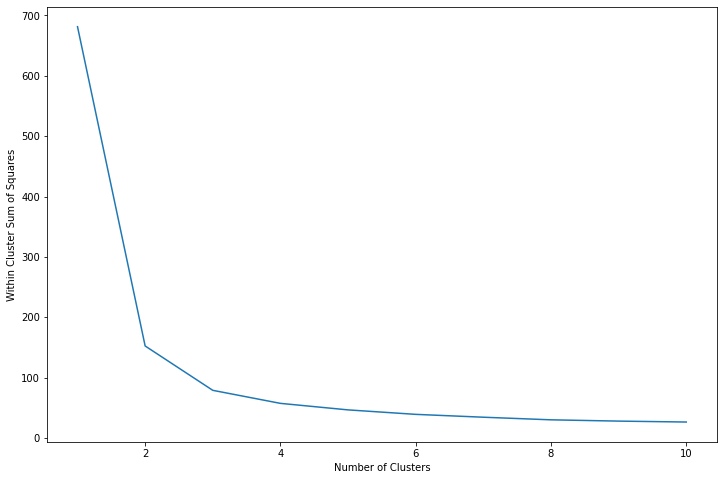

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(y=wcss, x=range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=None)

In [37]:
pca.fit(features)

PCA()

In [53]:
eigenvectors = pd.DataFrame(pca.explained_variance_ratio_, columns=['eigenvalue'])

In [46]:
eigenvectors

,eigenvalue
0,0.924619
1,0.053066
2,0.017103
3,0.005212


In [59]:
wine = pd.DataFrame(wine.data, columns=wine.feature_names)

In [60]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

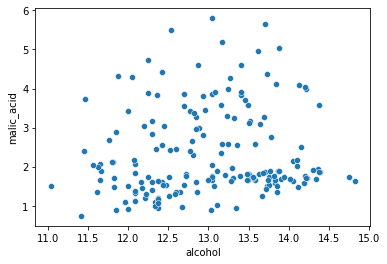

In [63]:
sns.scatterplot(data=wine, x='alcohol', y='malic_acid')
plt.show()

In [64]:
wine_small = wine[['alcohol', 'malic_acid']]

In [66]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(wine_small)
    wcss.append(kmeans.inertia_)

<AxesSubplot:>

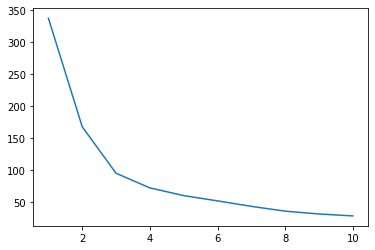

In [69]:
sns.lineplot(y=wcss, x=range(1, 11))

In [70]:
kmeans = KMeans(n_clusters=4, random_state=101, init='k-means++')

In [71]:
kmeans.fit(wine_small)

KMeans(n_clusters=4, random_state=101)

In [73]:
groups = kmeans.predict(wine_small)

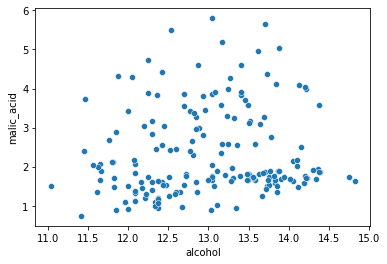

In [74]:
sns.scatterplot(data=wine, x='alcohol', y='malic_acid')
plt.show()

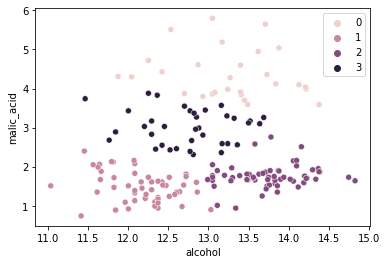

In [81]:
sns.scatterplot(data=wine, x='alcohol', y='malic_acid', hue=groups)
plt.show()